#### 1. Dane

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
# 1 -osoba chora, 0 - osoba niezakażona
prediction = pd.DataFrame(data={'y_true':[1,0,1,1,1,0,1,0,1,0], 'y_pred':[1,0,1,0,1,0,0,1,1,0]})
prediction

,y_true,y_pred
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
5,0,0
6,1,0
7,0,1
8,1,1
9,0,0


#### 2. Accuracy

In [10]:
prediction['result']= prediction.apply (lambda x: True if x['y_true'] == x['y_pred'] else False, 1)

In [15]:
# poprawne przewidywania/wszystkie próbki - 0,7, bądź 70% 

accuracy = prediction['result'].value_counts()[1] / prediction['result'].value_counts().sum() * 100
accuracy

70.0

#### 3. Macierz konfuzji/pomyłek

In [42]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import plotly.figure_factory as ff

In [43]:
y_true = prediction['y_true'].values
y_pred = prediction['y_pred'].values

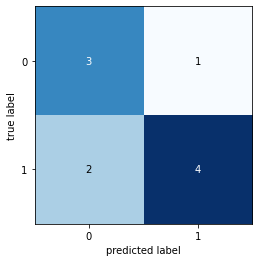

In [44]:
cm = confusion_matrix(y_true,y_pred )
plot_confusion_matrix(cm);

In [45]:
def plot_confusion_matrix(cm):
    
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

#### 4. Z macierzy konfuzji możemy uzyskać inne wskaźniki

In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [48]:
confusion_matrix = pd.DataFrame(data={'pred_0':['True Negative (TN)', 'False Negative (FN)'], 'pred_1':['False Positive (FP)', 'True Positive (TP)']},
                               index=['true_0', 'true_1'])

In [49]:
confusion_matrix

,pred_0,pred_1
true_0,True Negative (TN),False Positive (FP)
true_1,False Negative (FN),True Positive (TP)


![alt text](ocena.png "Ocena modelu")

In [53]:
confusion_matrix

,pred_0,pred_1
true_0,True Negative (TN),False Positive (FP)
true_1,False Negative (FN),True Positive (TP)


#### - FPR (False Positive Rate) - (type I error):

- procent zdarzenia, do którego nie doszło, a my je przewidzieliśmy (1 zamiast 0)


- FP / (FP + TN) - fałszywą jedynkę dzielimy przez ilość wszystkich 0 true (czyli FP + TN)

In [55]:
FPR = 1 / (1+3)
FPR

0.25

#### - FNR (False Negative Rate) - type II error - błąd drugiego rodzaju:

- procent zdarzenia, do któego doszło, a my jego nie przewidzieliśmy (0 zamiast 1)


- jest to bardzo istotna miara (istotniejsza FPR) - gdyż np. przewidzieliśmy, że osoba jest zdrowa, a była chora - więc może zarażac innych


- FN / (FN + TP)

In [56]:
FNR = 2/(2+4)
FNR

0.3333333333333333

#### - Precision - oznacza precyzję:

- ile jedynek nasz model wybrał poprawnie

In [58]:
precision = 4/(4+1) # tutaj dodajemy tą jędynkę, która pomiejsza procent (4/4 byłoby 100 % poprawnych 1)
precision

0.8

#### - Recall - mówi nam ile  poprawnych 1 oszacowaliśmy z wszystkich 1

In [61]:
recall = 4 /(2+4)
recall

0.6666666666666666

#### - F1 score - średnia harmoniczna prezycji  i recall:

- żeby zachować balans, musimy wybierać ten model, w któym F1 score jest największy